In [1]:
#https://www.kaggle.com/datasets/avikasliwal/used-cars-price-prediction?select=test-data.csv

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!kaggle datasets download -d avikasliwal/used-cars-price-prediction

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
import pandas as pd
import numpy as np

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
pd.set_option('display.max_columns', None)

##**Loading Dataset**

In [212]:
data = pd.read_csv('/content/test-data.csv')

In [213]:
print(data.shape)
data.head()

(1234, 13)


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [214]:
data.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price'],
      dtype='object')

**Removing Unecessary Columns**

In [215]:
data = data.drop(columns=['Unnamed: 0', 'Location', 'Transmission', 'Owner_Type', 'New_Price'])

In [216]:
data.head()

,Name,Year,Kilometers_Driven,Fuel_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,2014,40929,CNG,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,2013,54493,Petrol,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,2017,34000,Diesel,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,2012,139000,Diesel,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,2014,29000,Petrol,18.5 kmpl,1197 CC,82.85 bhp,5.0


**Removing Null Values form the Entire Dataset**

In [217]:
data.isnull().sum()

Name                  0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

In [218]:
data = data.dropna()

In [219]:
print(data.shape)

(1223, 8)


In [220]:
data.head()

,Name,Year,Kilometers_Driven,Fuel_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,2014,40929,CNG,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,2013,54493,Petrol,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,2017,34000,Diesel,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,2012,139000,Diesel,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,2014,29000,Petrol,18.5 kmpl,1197 CC,82.85 bhp,5.0


**Creating Different Dataset based on Fuel_Type**

In [221]:
fuel = data[data['Fuel_Type'] == 'CNG']
petrol = data[data['Fuel_Type'] == 'Petrol']
diesel = data[data['Fuel_Type'] == 'Diesel']

In [222]:
print(fuel.shape)
print(petrol.shape)
print(diesel.shape)

(6, 8)
(572, 8)
(643, 8)


In [223]:
diesel.head()

,Name,Year,Kilometers_Driven,Fuel_Type,Mileage,Engine,Power,Seats
2,Toyota Innova Crysta Touring Sport 2.4 MT,2017,34000,Diesel,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,2012,139000,Diesel,23.59 kmpl,1364 CC,null bhp,5.0
5,Mahindra XUV500 W8 2WD,2016,85609,Diesel,16.0 kmpl,2179 CC,140 bhp,7.0
6,Toyota Fortuner 4x2 AT TRD Sportivo,2015,59000,Diesel,12.55 kmpl,2982 CC,168.7 bhp,7.0
9,Mahindra XUV500 W6 2WD,2015,54684,Diesel,15.1 kmpl,2179 CC,140 bhp,7.0


**Cleaning the Mileage, Engine and Power columns**

In [224]:
diesel['Mileage'] = diesel['Mileage'].apply(lambda x: x.split()[0].strip())
diesel['Engine'] = diesel['Engine'].apply(lambda x: x.split()[0].strip())
diesel['Power'] = diesel['Power'].apply(lambda x: x.split()[0].strip())

In [225]:
diesel.head()

,Name,Year,Kilometers_Driven,Fuel_Type,Mileage,Engine,Power,Seats
2,Toyota Innova Crysta Touring Sport 2.4 MT,2017,34000,Diesel,13.68,2393,147.8,7.0
3,Toyota Etios Liva GD,2012,139000,Diesel,23.59,1364,null,5.0
5,Mahindra XUV500 W8 2WD,2016,85609,Diesel,16.0,2179,140,7.0
6,Toyota Fortuner 4x2 AT TRD Sportivo,2015,59000,Diesel,12.55,2982,168.7,7.0
9,Mahindra XUV500 W6 2WD,2015,54684,Diesel,15.1,2179,140,7.0


In [226]:
diesel.dtypes

Name                  object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Mileage               object
Engine                object
Power                 object
Seats                float64
dtype: object

**Removing Null Values from Power Columns**

In [227]:
diesel[diesel['Power'] == 'null']

,Name,Year,Kilometers_Driven,Fuel_Type,Mileage,Engine,Power,Seats
3,Toyota Etios Liva GD,2012,139000,Diesel,23.59,1364,null,5.0
122,Toyota Etios Liva GD,2012,121134,Diesel,23.59,1364,null,5.0
143,Ford Fiesta 1.4 SXI Duratorq,2008,135000,Diesel,17.8,1399,null,5.0
191,Tata Indica DLS,2006,140000,Diesel,13.5,1405,null,5.0
197,Hindustan Motors Contessa 2.0 DSL,1996,65000,Diesel,14.1,1995,null,5.0
259,Toyota Etios GD,2012,90000,Diesel,23.59,1364,null,5.0
426,Maruti Swift VDI BSIV W ABS,2016,69564,Diesel,17.8,1248,null,5.0
572,Ford Fiesta 1.4 SXi TDCi,2009,134000,Diesel,17.8,1399,null,5.0
606,Maruti Swift VDI BSIV,2012,72000,Diesel,17.8,1248,null,5.0
704,Ford Fiesta 1.4 SXi TDCi,2009,39408,Diesel,17.8,1399,null,5.0


In [228]:
diesel = diesel.drop(diesel[diesel['Power'] == 'null'].index)

**Converting String Columns to Float Columns so that we can do operation on it**

In [229]:
diesel['Mileage'] = diesel['Mileage'].astype(float)
diesel['Engine'] = diesel['Engine'].astype(float)
diesel['Power'] = diesel['Power'].astype(float)

diesel['Year'] = diesel['Year'].astype(float)
diesel['Kilometers_Driven'] = diesel['Kilometers_Driven'].astype(float)

In [230]:
diesel.dtypes

Name                  object
Year                 float64
Kilometers_Driven    float64
Fuel_Type             object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
dtype: object

##**Visualization**

In [231]:
sns.set();

###**Distribution Plot**

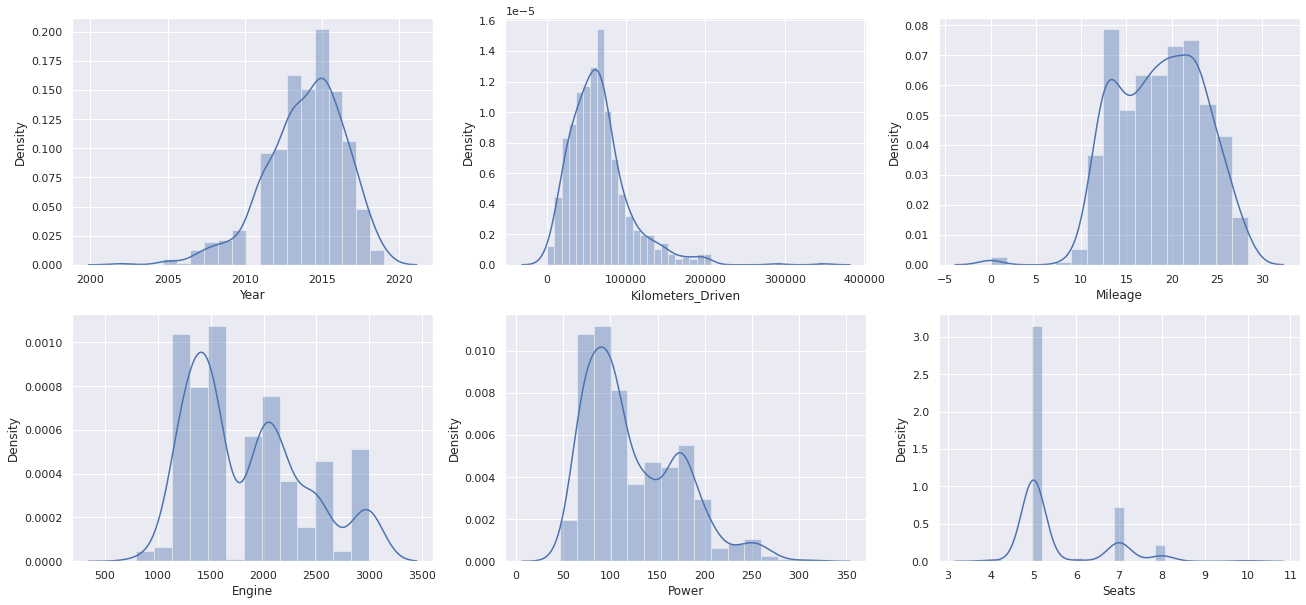

In [232]:
plt.figure(figsize=(22,10))
plt.subplot(2,3,1)
sns.distplot(diesel['Year'])

plt.subplot(2,3,2)
sns.distplot(diesel['Kilometers_Driven'])

plt.subplot(2,3,3)
sns.distplot(diesel['Mileage'])

plt.subplot(2,3,4)
sns.distplot(diesel['Engine'])

plt.subplot(2,3,5)
sns.distplot(diesel['Power'])

plt.subplot(2,3,6)
sns.distplot(diesel['Seats'])
plt.show()

###**Box Plot**  
***  
It will help us to find the Ouliers in the dataset

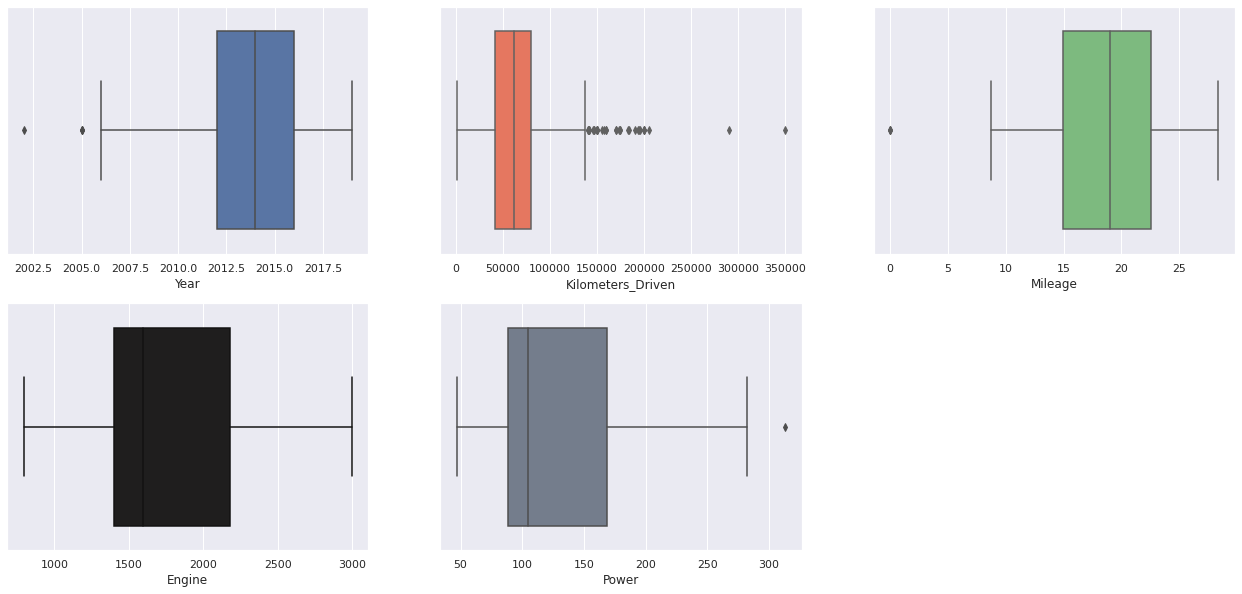

In [233]:
plt.figure(figsize=(22,10))
plt.subplot(2,3,1)
sns.boxplot(x=diesel["Year"])

plt.subplot(2,3,2)
sns.boxplot(x=diesel["Kilometers_Driven"],palette="Reds")

plt.subplot(2,3,3)
sns.boxplot(x=diesel["Mileage"],palette="Greens")

plt.subplot(2,3,4)
sns.boxplot(x=diesel["Engine"],palette="icefire")

plt.subplot(2,3,5)
sns.boxplot(x=diesel["Power"],palette="bone")
plt.show()

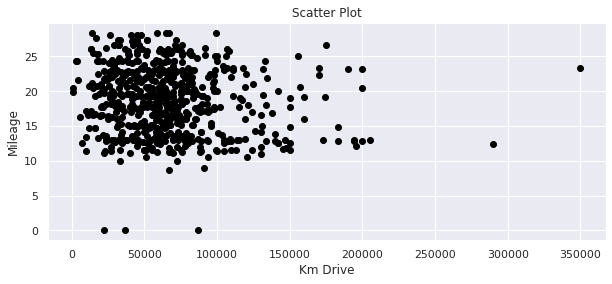

In [234]:
def scatter_plots(df1,df2):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.scatter(df1,df2, color='black')
    ax.set_xlabel('Km Drive')
    ax.set_ylabel('Mileage')
    plt.title("Scatter Plot")
    plt.show()
scatter_plots(diesel['Kilometers_Driven'],diesel['Mileage'])

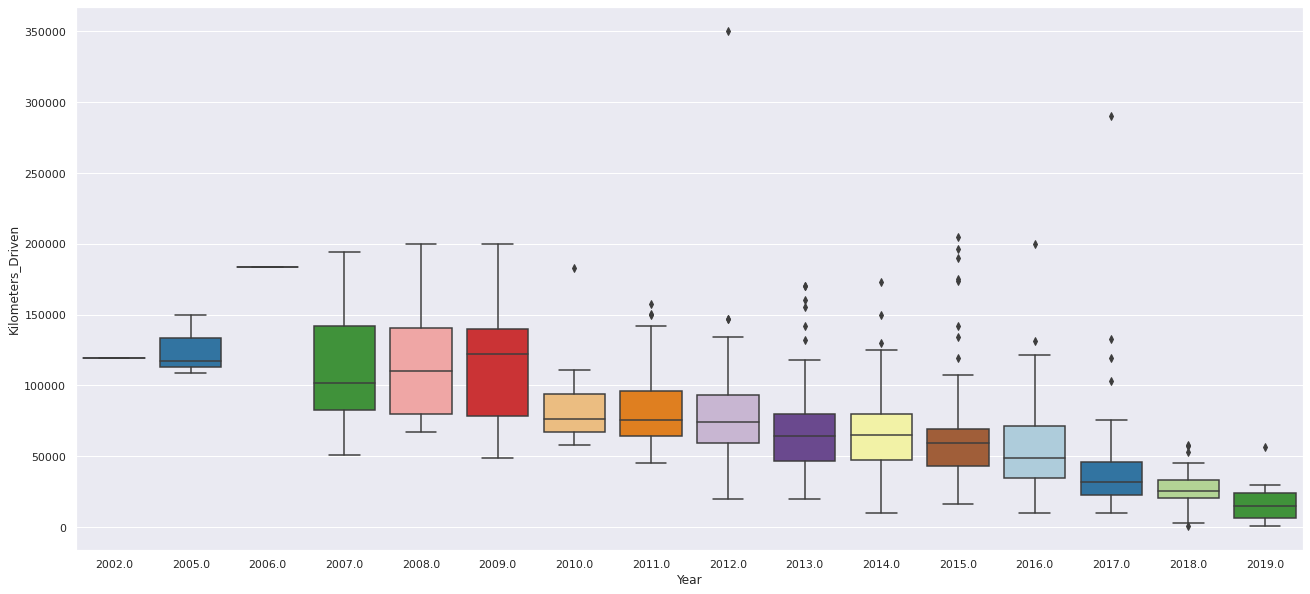

In [235]:
plt.figure(figsize=(22,10))
sns.boxplot(x="Year", y="Kilometers_Driven", data=diesel, palette="Paired")

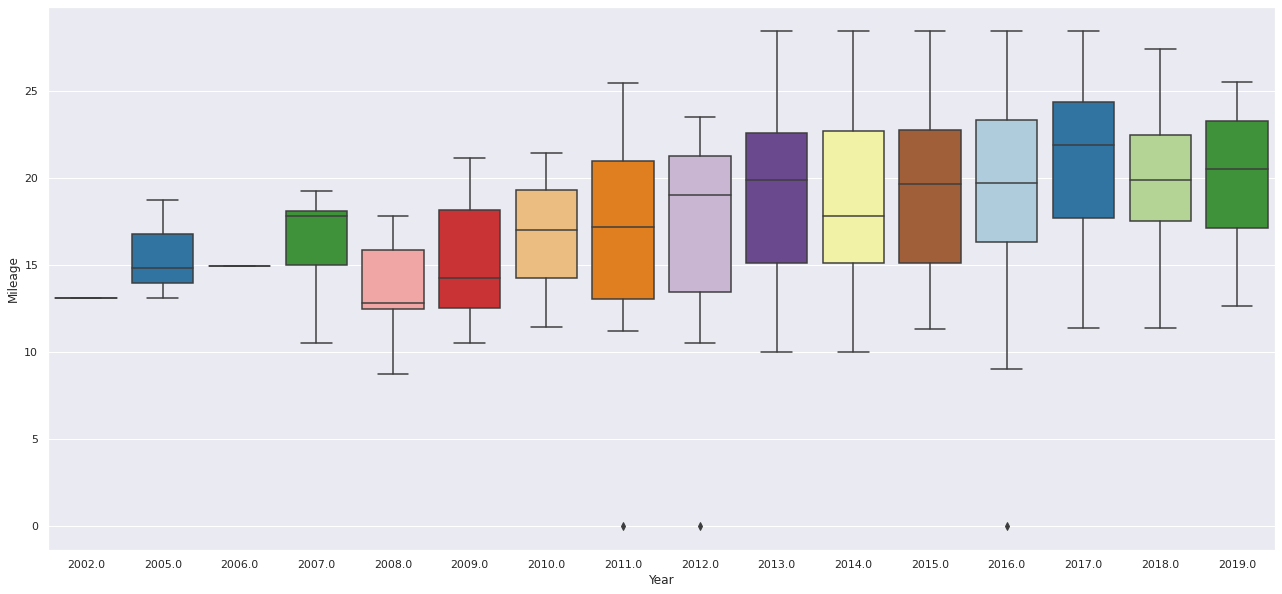

In [236]:
plt.figure(figsize=(22,10))
sns.boxplot(x="Year", y="Mileage", data=diesel, palette="Paired")

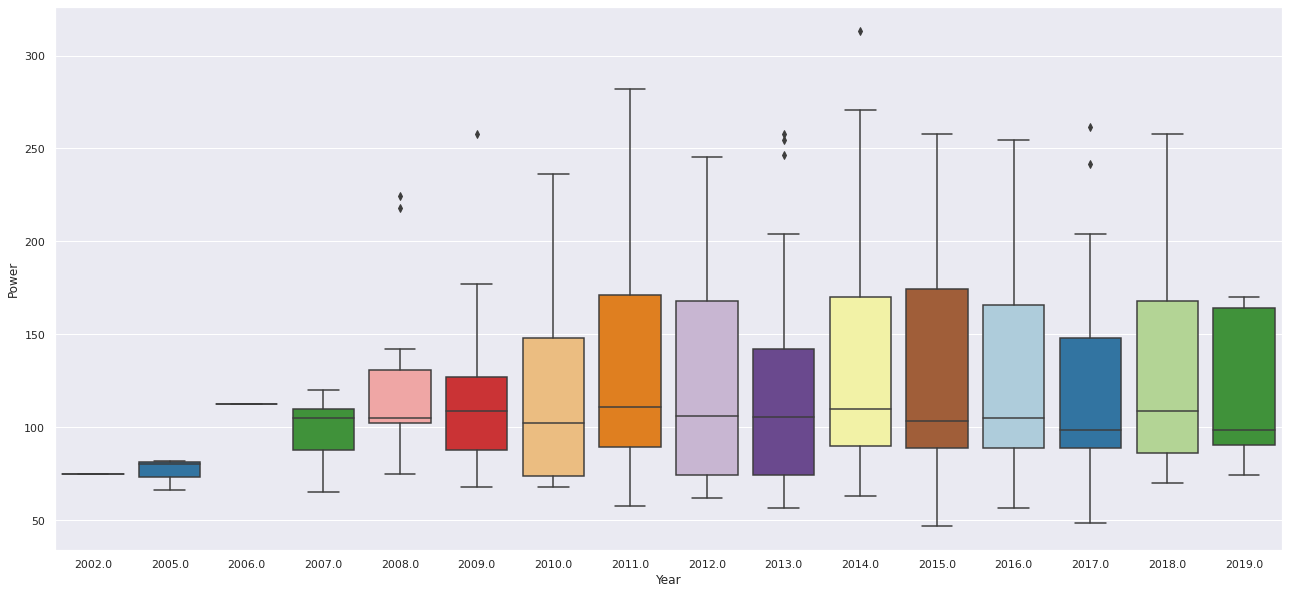

In [237]:
plt.figure(figsize=(22,10))
sns.boxplot(x="Year", y="Power", data=diesel, palette="Paired")

##**Handling Outliers**  
***  
We will handle the outliers on the basis of IQR techniques that is Inter Quartile Range.  
So the data that is outside that range that should be considered as outliers.

In [238]:
import pandas as pd   
from IPython.display import display_html 

yd = diesel[['Year']].describe()
kmd = diesel[['Kilometers_Driven']].describe()
md = diesel[['Mileage']].describe()


ydi = yd.style.set_table_attributes("style='display:inline'")
kmdi = kmd.style.set_table_attributes("style='display:inline'")
mdi = md.style.set_table_attributes("style='display:inline'")

display_html(ydi._repr_html_()+kmdi._repr_html_() +mdi._repr_html_(), raw=True)

,Year
count,631.000000
mean,2013.919176
std,2.568700
min,2002.000000
25%,2012.000000
50%,2014.000000
75%,2016.000000
max,2019.000000
,Kilometers_Driven
count,631.000000


**Finding the Range for the Outliers**

In [239]:
year25 = diesel['Year'].quantile(0.25)
km25 = diesel['Kilometers_Driven'].quantile(0.25)
mileage25 = diesel['Mileage'].quantile(0.25)

year75 = diesel['Year'].quantile(0.75)
km75 = diesel['Kilometers_Driven'].quantile(0.75)
mileage75 = diesel['Mileage'].quantile(0.75)

In [240]:
yiqr = year75 - year25
kmiqr = km75 - km25
miqr = mileage75 - mileage25

In [241]:
yul = year75 + 1.5 * yiqr
yll = year25 -  1.5 * yiqr

kmul = km75 + 1.5 * kmiqr
kmll = km25 -  1.5 * kmiqr

mul = mileage75 + 1.5 * miqr
mll = mileage25 -  1.5 *miqr

In [242]:
print(kmul)
print(yll)

138316.5
2006.0


**The outliers**

In [243]:
outliers = diesel[(diesel['Year'] < yll) | (diesel['Mileage'] < mll) | (diesel['Kilometers_Driven'] > kmul)]

In [244]:
print(outliers.shape)

(40, 8)


In [245]:
outliers.head()

,Name,Year,Kilometers_Driven,Fuel_Type,Mileage,Engine,Power,Seats
17,Ford Ikon 1.4 TDCi DuraTorq,2009.0,140000.0,Diesel,13.80,1399.0,68.00,5.0
20,Maruti Ritz LDi,2016.0,200000.0,Diesel,23.20,1248.0,73.94,5.0
58,Tata Indigo CS LX (TDI) BS III,2011.0,150000.0,Diesel,19.09,1396.0,69.00,5.0
142,Volkswagen Vento Diesel Highline,2011.0,157301.0,Diesel,20.54,1598.0,103.60,5.0
151,Hyundai Accent CRDi,2005.0,109000.0,Diesel,13.10,1493.0,82.00,5.0


##**Completely Removed Outliers**

In [246]:
noOutliers = diesel[(diesel['Year'] > yll) & (diesel['Mileage'] > mll) & (diesel['Kilometers_Driven'] < kmul)]

In [247]:
print(noOutliers.shape)

(591, 8)


In [248]:
noOutliers.head()

,Name,Year,Kilometers_Driven,Fuel_Type,Mileage,Engine,Power,Seats
2,Toyota Innova Crysta Touring Sport 2.4 MT,2017.0,34000.0,Diesel,13.68,2393.0,147.8,7.0
5,Mahindra XUV500 W8 2WD,2016.0,85609.0,Diesel,16.00,2179.0,140.0,7.0
6,Toyota Fortuner 4x2 AT TRD Sportivo,2015.0,59000.0,Diesel,12.55,2982.0,168.7,7.0
9,Mahindra XUV500 W6 2WD,2015.0,54684.0,Diesel,15.10,2179.0,140.0,7.0
10,Audi Q5 2008-2012 2.0 TDI,2012.0,78000.0,Diesel,12.80,1968.0,167.6,5.0


In [249]:
noOutliers[noOutliers['Kilometers_Driven'] > kmul]

,Name,Year,Kilometers_Driven,Fuel_Type,Mileage,Engine,Power,Seats


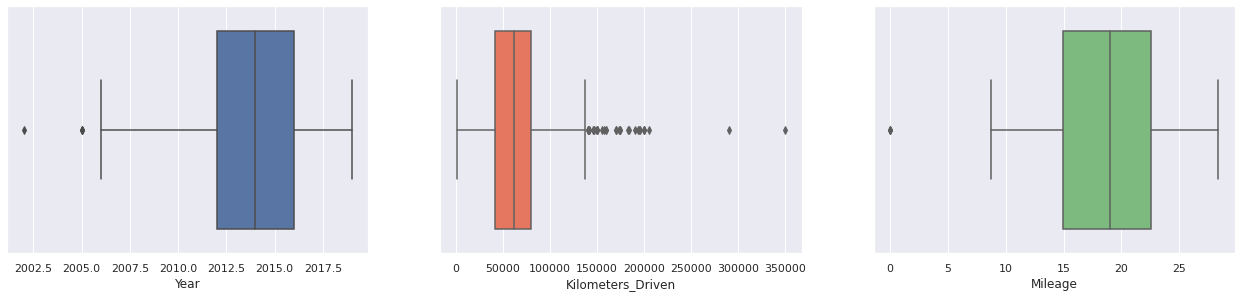

In [250]:
plt.figure(figsize=(22,10))
plt.subplot(2,3,1)
sns.boxplot(x=diesel["Year"])

plt.subplot(2,3,2)
sns.boxplot(x=diesel["Kilometers_Driven"],palette="Reds")

plt.subplot(2,3,3)
sns.boxplot(x=diesel["Mileage"],palette="Greens")
plt.show()

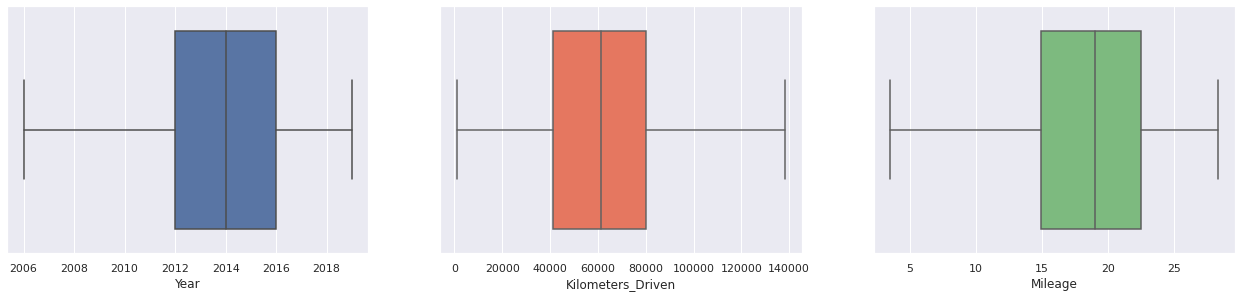

In [255]:
plt.figure(figsize=(22,10))
plt.subplot(2,3,1)
sns.boxplot(x=noOutliersCapping["Year"])

plt.subplot(2,3,2)
sns.boxplot(x=noOutliersCapping["Kilometers_Driven"],palette="Reds")

plt.subplot(2,3,3)
sns.boxplot(x=noOutliersCapping["Mileage"],palette="Greens")
plt.show()